## Forecast - mean

RMSE: 49643.847412114286
MAE: 41865.49259580261


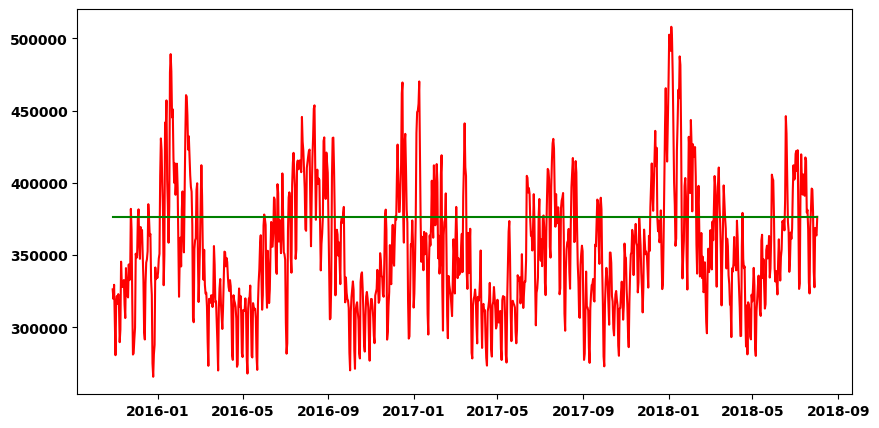

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import time
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('AEP_hourly.csv')
data = data.set_index('Datetime')
data = data.sort_index()
data = data[~data.index.duplicated(keep='first')]
data.index = pd.to_datetime(data.index)
data = data.resample('D').sum()[:-1]


train = data[data.index <= '2015-10-27']
test = data[data.index > '2015-10-27']

past_point = train['AEP_MW'].iloc[-1]
avg_forecast = [train['AEP_MW'].mean()] * len(test)

fig = plt.figure(figsize=(10,5))
plt.plot(test.index, test['AEP_MW'], color='red')
plt.plot(test.index, avg_forecast, color='green')

rmse_mean = root_mean_squared_error(test['AEP_MW'], avg_forecast)
mae_mean = mean_absolute_error(test['AEP_MW'], avg_forecast)
print(f'RMSE: {rmse_mean}')
print(f'MAE: {mae_mean}')

## Forecast - previous value

RMSE: 24426.22383619784
MAE: 18651.22475247525


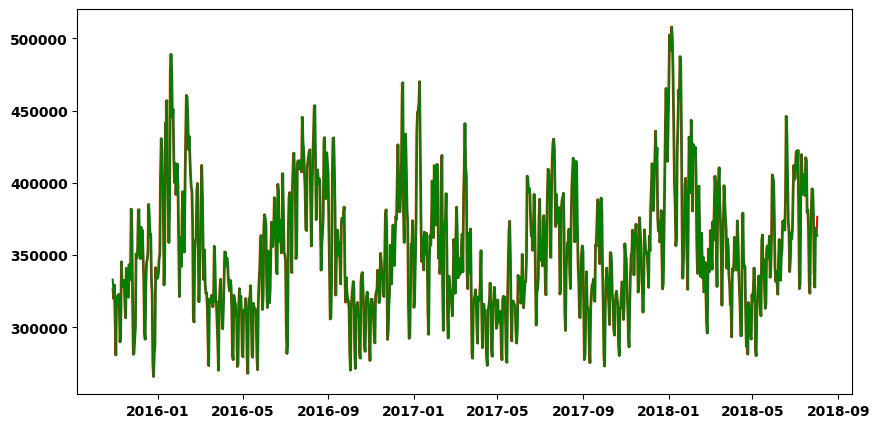

In [2]:
past_point = train['AEP_MW'].iloc[-1]

dummy_forecast = []
for point in test['AEP_MW']:
    dummy_forecast.append(past_point)
    past_point = point

fig = plt.figure(figsize=(10,5))
plt.plot(test.index, test['AEP_MW'], color='red')
plt.plot(test.index, dummy_forecast, color='green')

rmse_1 = root_mean_squared_error(test['AEP_MW'], dummy_forecast)
mae_1 = mean_absolute_error(test['AEP_MW'], dummy_forecast)
print(f'RMSE: {rmse_1}')
print(f'MAE: {mae_1}')

## Forecast - week ago
The value of a week ago is used as the forecast.

RMSE: 41803.93209086229
MAE: 32056.83366336634


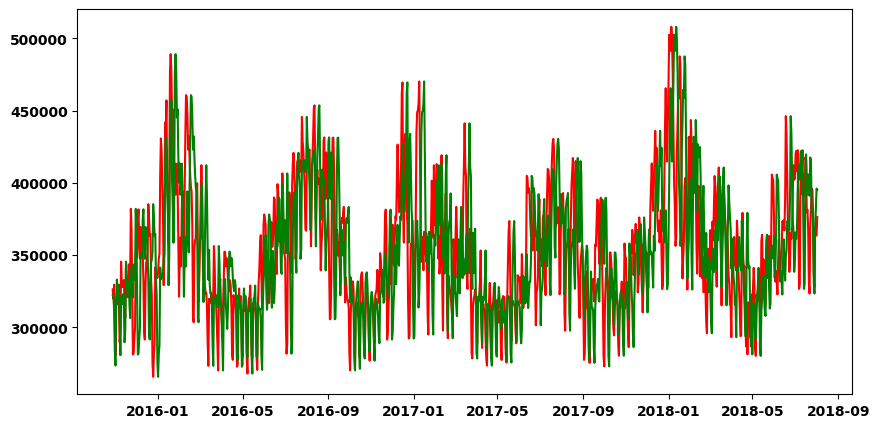

In [3]:
moving_week = list(train['AEP_MW'].iloc[-7:])
forecast_7_days = []

for point in test['AEP_MW']:
    forecast_7_days.append(moving_week[0])
    moving_week.pop(0)
    moving_week.append(point)

fig = plt.figure(figsize=(10,5))
plt.plot(test.index, test['AEP_MW'], color='red')
plt.plot(test.index, forecast_7_days, color='green')

rmse_7 = root_mean_squared_error(test['AEP_MW'], forecast_7_days)
mae_7 = mean_absolute_error(test['AEP_MW'], forecast_7_days)
print(f'RMSE: {rmse_7}')
print(f'MAE: {mae_7}')

In [4]:
pd.DataFrame({'MAE': [mae_mean, mae_1, mae_7], 
              'RMSE': [rmse_mean, rmse_1, rmse_7]},
             index=['mean', 'naive_h1', 'week_ago'])

,MAE,RMSE
mean,41865.492596,49643.847412
naive_h1,18651.224752,24426.223836
week_ago,32056.833663,41803.932091
